In [329]:
# Import relevant packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [330]:
# Read the Dataset
df = pd.read_csv("study_performance.csv")
df.head() # Check that data is being read

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [331]:
# UNDERSTAND THE DATA


In [332]:
# Determine the shape of the data we loaded (rows and columns)
df.shape


(1000, 8)

In [333]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [334]:
# Check all columns in dataset
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [335]:
# Observe datatypes in our dataset
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [336]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [337]:
# DATA PREPARATION

In [338]:
# Identify missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [339]:
# Check for duplications
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [340]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [341]:
# FEATURE/ VARIABLES UNDERSTANDING:

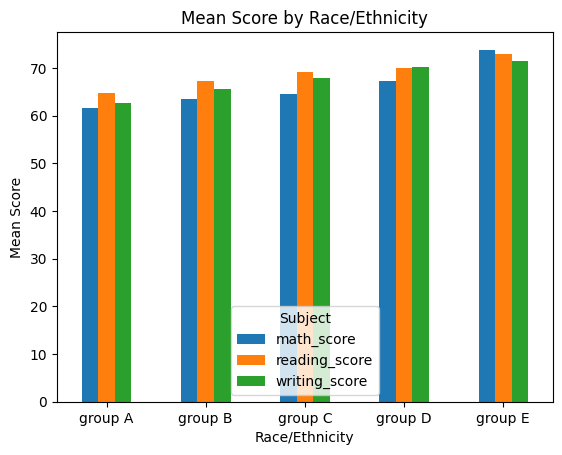

In [342]:
# Determine Reading score by  ethnic groups

# Group data by 'race_ethnicity' and calculate mean score for each race
grouped_data = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()

# Plot bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mean Score')
plt.title('Mean Score by Race/Ethnicity')
plt.xticks(rotation=0)  
plt.legend(title='Subject')  # Add legend with subject names
plt.show()

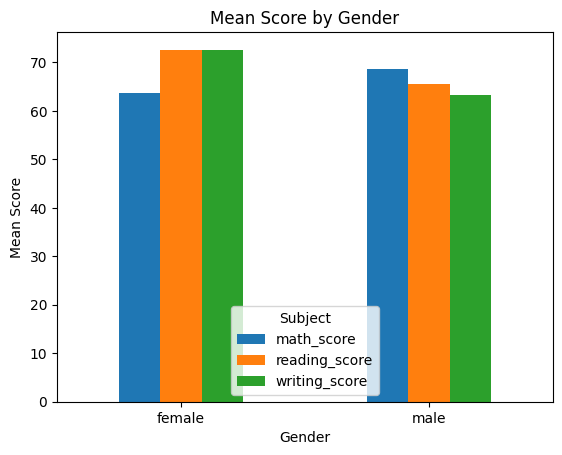

In [348]:
# Determine Reading score by  Gender

# Group data by 'gender' and calculate mean score for each gender
grouped_data = df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

# Plot bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Mean Score by Gender')
plt.xticks(rotation=0)  
plt.legend(title='Subject')  # Add legend with subject names
plt.show()

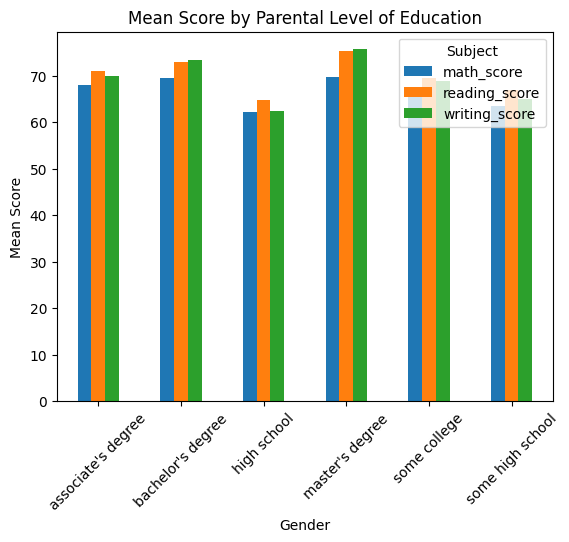

In [347]:
# Determine Reading score by  Parental Level of Education

# Group data by 'gender' and calculate mean score for each gender
grouped_data = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()

# Plot bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Mean Score by Parental Level of Education')
plt.xticks(rotation=45)  
plt.legend(title='Subject')  # Add legend with subject names
plt.show()

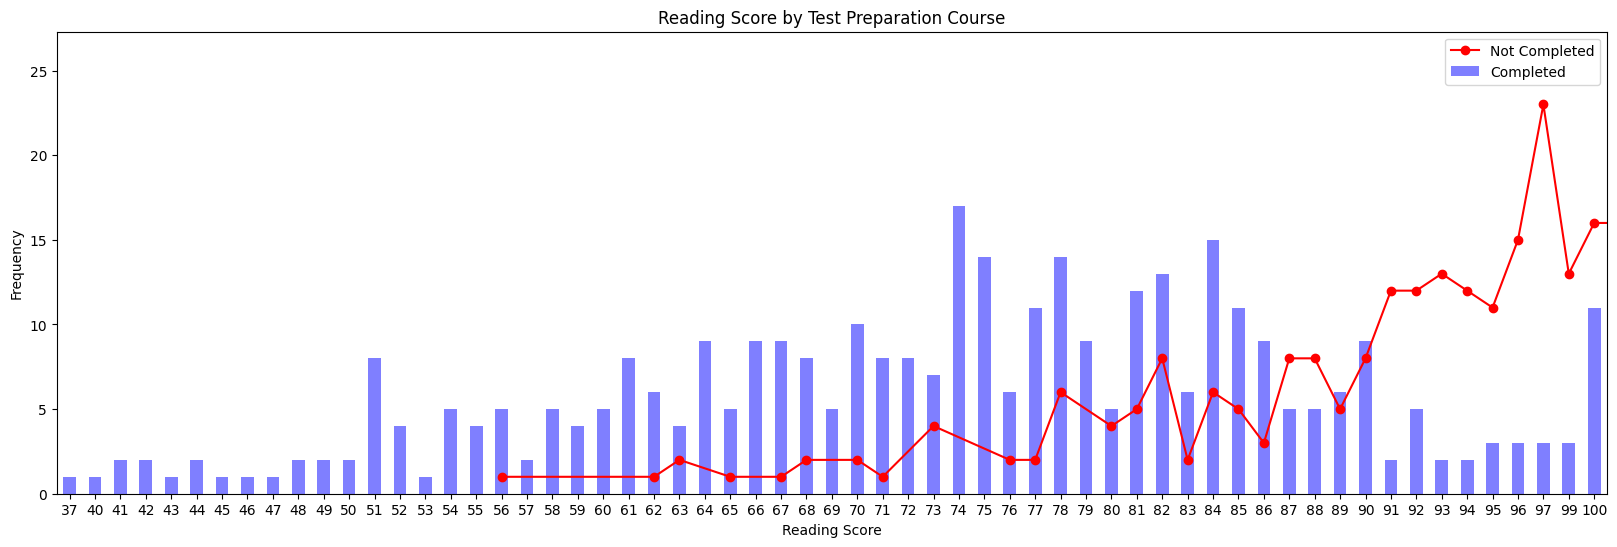

In [351]:
# Filter data for completed test preparation course
df_completed = df[df['test_preparation_course'] == 'completed']
# Filter data for not completed test preparation course
df_not_completed = df[df['test_preparation_course'] != 'completed']

# Create a new figure with larger size
fig, ax = plt.subplots(figsize=(20, 6))

# Plot bar graph for reading score with completed test preparation course
df_completed['reading_score'].value_counts().sort_index().plot(kind='bar', ax=ax, color='blue', alpha=0.5, label='Completed')

# Plot line graph for reading score with not completed test preparation course
df_not_completed['reading_score'].value_counts().sort_index().plot(kind='line', ax=ax, color='red', marker='o', label='Not Completed')

# Set labels and title
ax.set_xlabel('Reading Score')
ax.set_ylabel('Frequency')
ax.set_title('Reading Score by Test Preparation Course')

# Show legend
ax.legend()

# Show plot
plt.show()

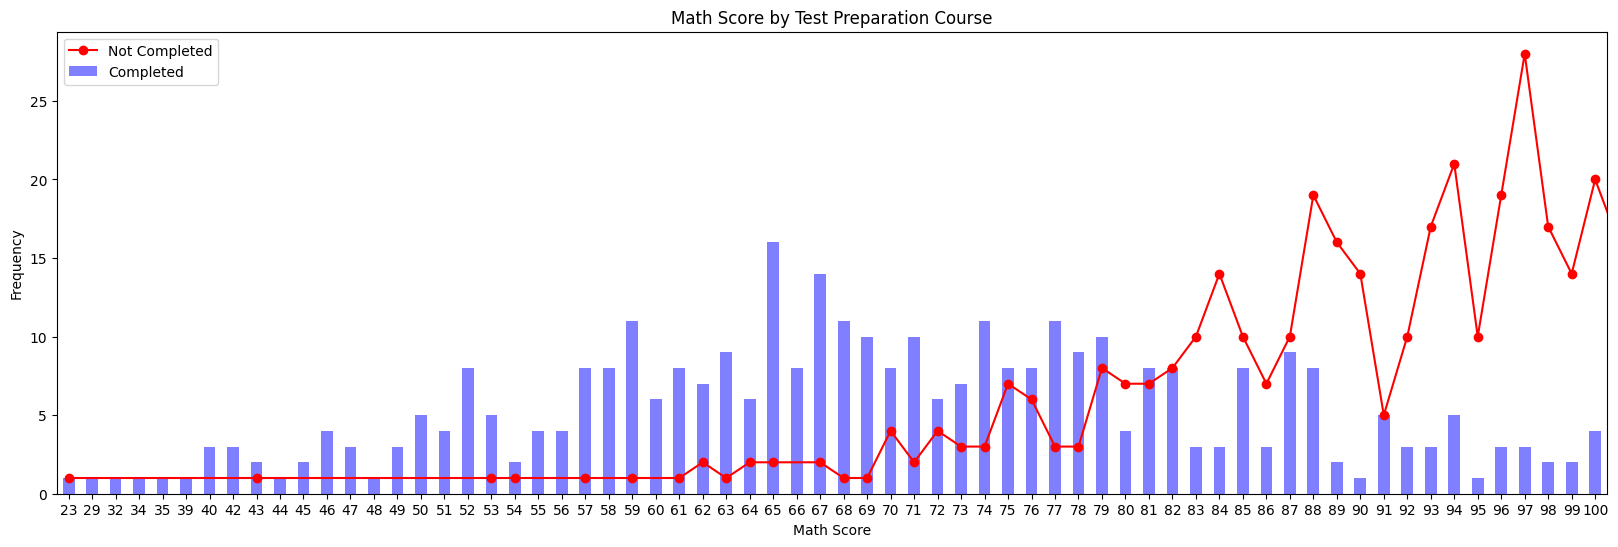

In [317]:
# Filter data for completed test preparation course
df_completed = df[df['test_preparation_course'] == 'completed']
# Filter data for not completed test preparation course
df_not_completed = df[df['test_preparation_course'] != 'completed']

# Create a new figure with larger size
fig, ax = plt.subplots(figsize=(20, 6))

# Plot bar graph for math score with completed test preparation course
df_completed['math_score'].value_counts().sort_index().plot(kind='bar', ax=ax, color='blue', alpha=0.5, label='Completed')

# Plot line graph for math score with not completed test preparation course
df_not_completed['math_score'].value_counts().sort_index().plot(kind='line', ax=ax, color='red', marker='o', label='Not Completed')

# Set labels and title
ax.set_xlabel('Math Score')
ax.set_ylabel('Frequency')
ax.set_title('Math Score by Test Preparation Course')

# Show legend
ax.legend()

# Show plot
plt.show()

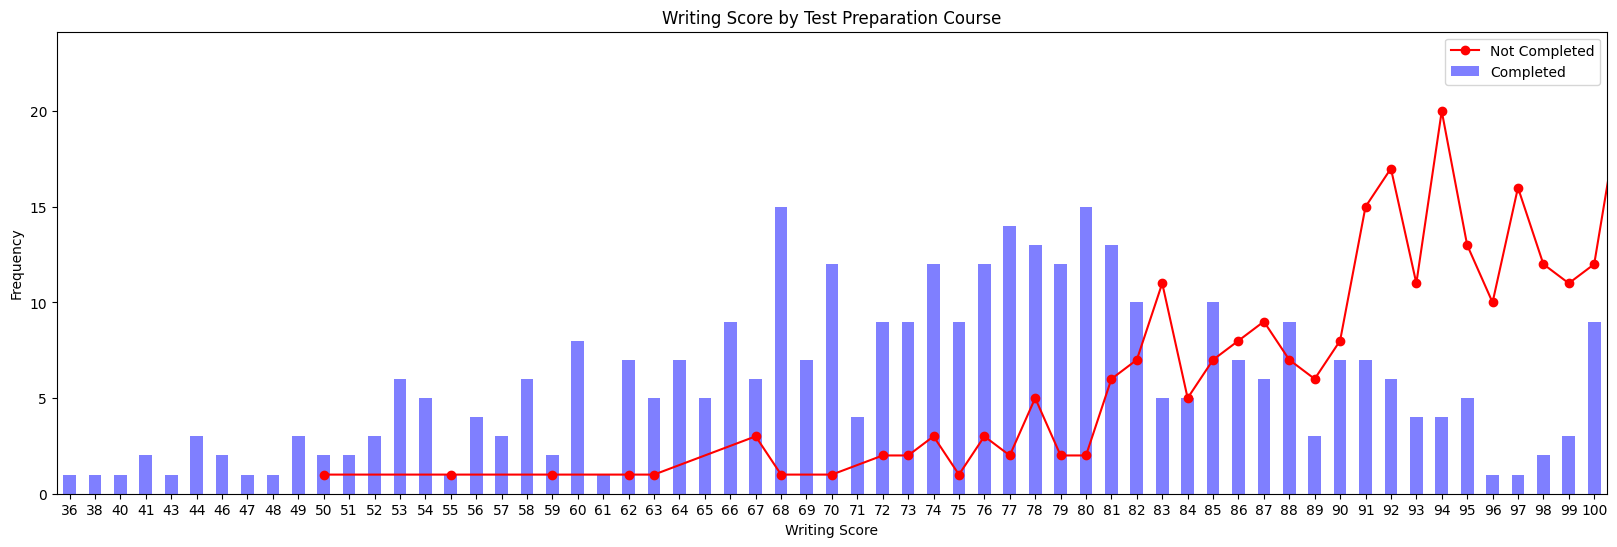

In [318]:
# Filter data for completed test preparation course
df_completed = df[df['test_preparation_course'] == 'completed']
# Filter data for not completed test preparation course
df_not_completed = df[df['test_preparation_course'] != 'completed']

# Create a new figure with larger size
fig, ax = plt.subplots(figsize=(20, 6))

# Plot bar graph for writing score with completed test preparation course
df_completed['writing_score'].value_counts().sort_index().plot(kind='bar', ax=ax, color='blue', alpha=0.5, label='Completed')

# Plot line graph for writing score with not completed test preparation course
df_not_completed['writing_score'].value_counts().sort_index().plot(kind='line', ax=ax, color='red', marker='o', label='Not Completed')

# Set labels and title
ax.set_xlabel('Writing Score')
ax.set_ylabel('Frequency')
ax.set_title('Writing Score by Test Preparation Course')

# Show legend
ax.legend()

# Show plot
plt.show()

In [319]:
# FEATURE(VARIABLE)  RELATIONSHIPS


In [206]:
# Convert non- numerica data to numeric to determine correlations
non_numeric_columns = ['race_ethnicity', 'parental_level_of_education', 'gender', 'lunch', 'test_preparation_course']

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    df[column] = label_encoder.fit_transform(df[column])


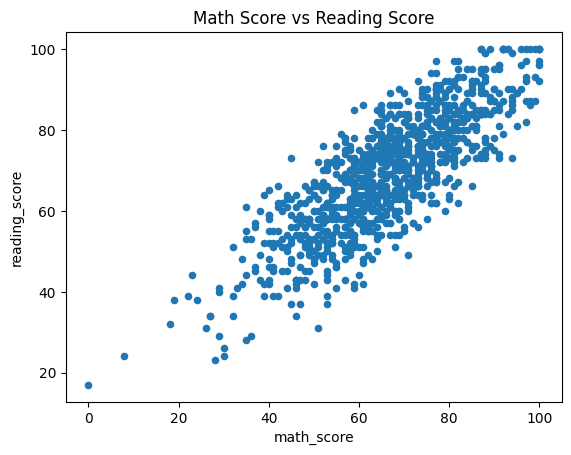

In [207]:
# Compare two features side by side on a scatter plot
df.plot(kind='scatter', x='math_score', y='reading_score', title='Math Score vs Reading Score')
plt.show()



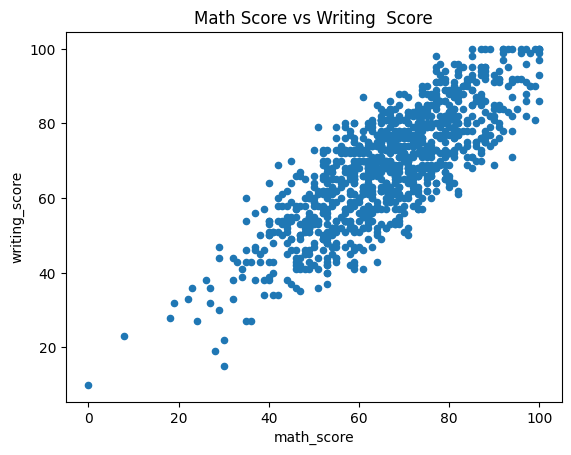

In [208]:
# Compare two features side by side on a scatter plot
df.plot(kind='scatter', x='math_score', y='writing_score', title='Math Score vs Writing  Score')
plt.show()

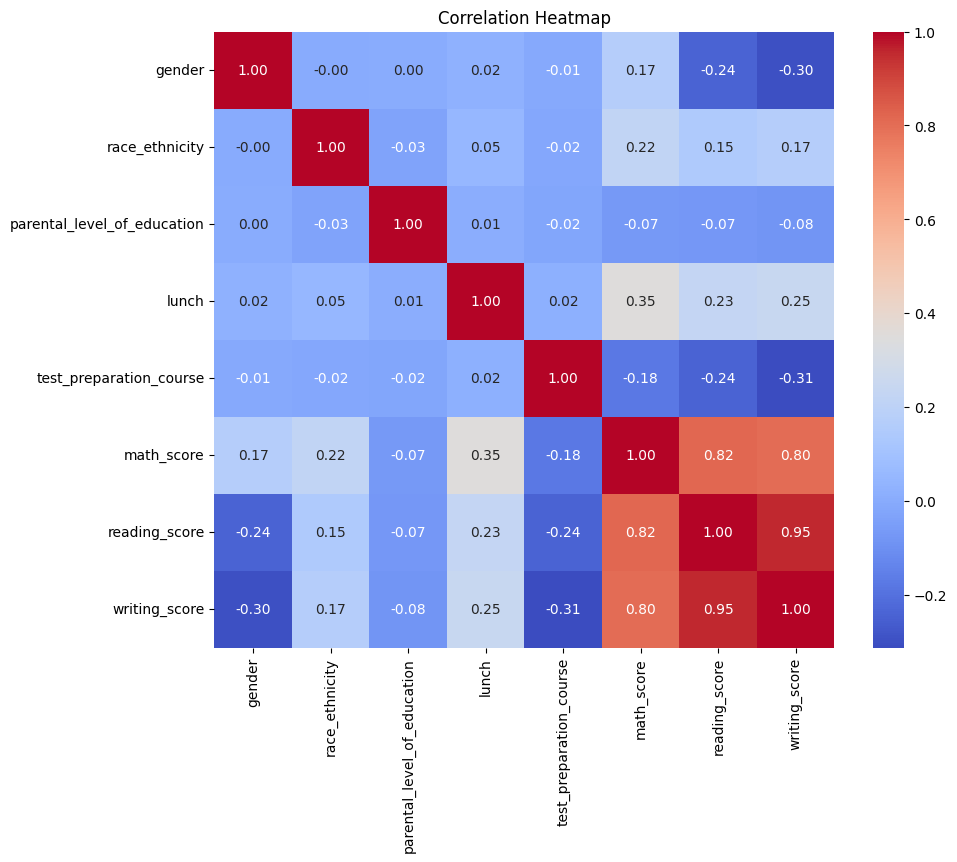

In [209]:
# Convert non-numeric data to numeric to determine correlations
non_numeric_columns = ['race_ethnicity', 'parental_level_of_education', 'gender', 'lunch', 'test_preparation_course']

# Apply label encoding to non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [352]:
# Be mindful of observations listed below when writing report/analysis

'''
GENDER & LUCNH
- Gender and Lunch (0.02): suggests a very weak positive correlation between gender and lunch. 
This means that there is a very slight tendency for a relationship between gender and whether a student receives lunch, 
but the relationship is very weak and likely not practically significant.

GENDER & TEST PREPARATION
- Gender and Test Preparation (-0.01):suggests an extremely weak negative correlation between gender and test preparation. 
Again, this indicates that there may be a very slight tendency for a relationship between gender and test preparation, 
but the relationship is not practically significant.

The correlations between test preparation (-0.01), gender (-0.02), parental education (-0.02), and lunch (0.02) are all relatively weak. 
These coefficients suggest minimal linear relationships between these variables. 

- TEST PREPARATION & ACADEMCIS
Test Preparation & Math Score, Reading Score, Writing Score: has a negative correlation with math score (-0.18) and reading score (-0.31). 
This suggests that students who complete test preparation tend to have slightly lower math and reading scores.


- GENDER AND ACADEMICS
Math Score (0.17): suggests a weak positive correlation between gender and math score. 
This means that there may be a slight tendency for one gender to have slightly higher math scores compared to the other, but the relationship is not strong.
Reading Score (-0.24): A correlation coefficient of -0.24 suggests a moderate negative correlation between gender and reading score. 
This indicates that there is a more noticeable tendency for one gender to have lower reading scores compared to the other, with a stronger relationship compared to math scores.
Writing Score (0.30):  suggests a moderate positive correlation between gender and writing score. 
This means that there is a moderate tendency for one gender to have slightly higher writing scores compared to the other. 
The positive correlation indicates that as the gender variable increases (e.g., from male to female), the writing score tends to increase as well.

- ACADEMICS SUBDOMAINS
The correlations between Reading (0.82) and Writing (0.8) Scores with Math indicate a positive relationship. 
This implies that students excelling in math tend to perform well in reading and writing, and vice versa. 
Similarly, the correlations between Reading (0.95) and Math (0.8) Scores with Writing reaffirm this positive relationship. 
Overall, these correlations signify strong positive associations among math, reading, and writing scores.
This suggests that students proficient in one subject are likely to excel in others, showing a broad academic proficiency across multiple subjects.

- LUNCH AND ACADEMICS
There is a moderate positive correlation with Lunch & Writing Score (0.25), suggesting that as the lunch type changes, 
the writing score tends to change in the same direction.
While the  Lunch & Reading Score (0.23) correlation, is still positive, it is slightly weaker compared to the correlation 
between lunch and writing score.
The Lunch & Math Score (0.35): correlation shows the strongest positive relationship, indicating that lunch type has a more pronounced effect on 
math scores compared to writing and reading scores.

Parental Level of Education & Math Score, Reading Score, Writing Score: has negative correlations with math score (-0.07), reading score (-0.07), and writing score (-0.08), 
though these correlations are relatively weak.
This suggests that there may be a slight tendency for students with parents having higher education levels to have slightly lower scores in these subjects.

Race/Ethnicity & Math Score, Reading Score, Writing Score: has positive correlations with math score (0.22) and writing score (0.17), 
and a weaker positive correlation with reading score (0.15). 
This reiterates what we see in the bar chart(race v performance) that there may be differences in performance 
across different racial/ethnic groups, with some groups tending to perform better in certain subjects.

'''



'\nGENDER & LUCNH\n- Gender and Lunch (0.02): suggests a very weak positive correlation between gender and lunch. \nThis means that there is a very slight tendency for a relationship between gender and whether a student receives lunch, \nbut the relationship is very weak and likely not practically significant.\n\nGENDER & TEST PREPARATION\n- Gender and Test Preparation (-0.01):suggests an extremely weak negative correlation between gender and test preparation. \nAgain, this indicates that there may be a very slight tendency for a relationship between gender and test preparation, \nbut the relationship is not practically significant.\n\nThe correlations between test preparation (-0.01), gender (-0.02), parental education (-0.02), and lunch (0.02) are all relatively weak. \nThese coefficients suggest minimal linear relationships between these variables. \n\n- TEST PREPARATION & ACADEMCIS\nTest Preparation & Math Score, Reading Score, Writing Score: has a negative correlation with math sc